In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import matplotlib.patches as patches
from collections import Counter
import random
import xml.etree.ElementTree as ET
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset,DataLoader
from torch import nn
from PIL import Image
import cv2
import numpy

import sys
import torch.optim as optim
from tqdm.notebook import tqdm
import gc



In [2]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
path_start = "/content/drive/MyDrive/" 


In [4]:
train = pd.read_csv(os.path.join(path_start,"Zindi_signs/Train.csv"))
train.head()

,img_IDS,Label
0,ImageID_33HMDMJ3,Temple
1,ImageID_V5POEX4O,Church
2,ImageID_89CCCCW6,Enough/Satisfied
3,ImageID_GNJXOWX5,Me
4,ImageID_7Q9LOP7R,Love


In [5]:
test = pd.read_csv(os.path.join(path_start,"Zindi_signs/Test.csv"))
test.head()

,img_IDS
0,ImageID_USRB8QNG
1,ImageID_SZ8D1ZJI
2,ImageID_4OJO2F8J
3,ImageID_IEE4XV0B
4,ImageID_BP0O0WZ9


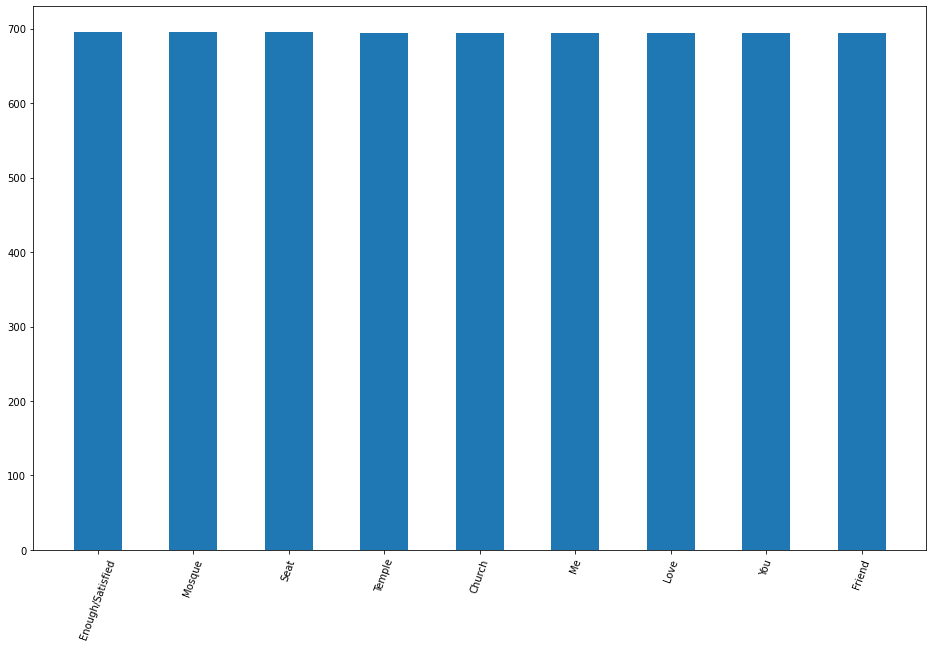

In [6]:
#class distribution
values = train.Label.value_counts().values
labels = train.Label.value_counts().index.values

indexes = np.arange(len(labels))
width = 0.5
plt.figure(figsize = (16,10))
plt.bar(indexes, values, width, align='edge')
plt.xticks(indexes + width * 0.5, labels, rotation=70)
plt.show()

In [7]:
sample_submission = pd.read_csv(os.path.join(path_start, "Zindi_signs/SampleSubmission.csv"))
sample_submission.head()

,img_IDS,Church,Enough/Satisfied,Friend,Love,Me,Mosque,Seat,Temple,You
0,ImageID_USRB8QNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ImageID_SZ8D1ZJI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ImageID_4OJO2F8J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ImageID_IEE4XV0B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ImageID_BP0O0WZ9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
n_classes = len(set(train.Label.values))
labels_dict = {i:el for i,el in enumerate(sample_submission.columns[1:])}
labels_dict_inversed = {el:i for i,el in enumerate(sample_submission.columns[1:])}

In [9]:
path = os.path.join(path_start, "Zindi_signs/Images/Images/")
path_train = os.path.join(path_start, "Zindi_signs/img/train/")
path_test = os.path.join(path_start, "Zindi_signs/img/test/")
paths = [path_train,path_test]

In [10]:
#wrong pics

fl = ['ImageID_H865NRZ4',
 'ImageID_N1FE792X',
 'ImageID_U9P07SMT',
 'ImageID_DAN12R0K',
 'ImageID_G87FKBQ0',
 'ImageID_0RWNBU85',
 'ImageID_BYO9GTY4',
 'ImageID_FEFS5R1Q',
 'ImageID_HEA0X15D',
 'ImageID_L6DF7L4T',
 'ImageID_TUE1CAYK',
 'ImageID_G88I8RLC',
 'ImageID_IRVFEMOI',
 'ImageID_I7JQGR44',
 'ImageID_LW7CYKZL',
 'ImageID_HO26LVWE',
 'ImageID_55HLIS7K',
 'ImageID_KZM9QBI8',
 'ImageID_LU4013XR',
 'ImageID_ZKIRW1K2',
 'ImageID_VJPPH215',
 'ImageID_1JVQDHLV',
 'ImageID_7U2SHOZ3',
 'ImageID_5MCMKNHT',
 'ImageID_K3LSRGHZ',
 'ImageID_0R1JN7AC',
 'ImageID_D4KRNJ7O',
 'ImageID_2SYMFGS5',
 'ImageID_SW0JF9OR',
 'ImageID_CKV4NWZT',
 'ImageID_KH7CLZM8',
 'ImageID_DKH9T5LV',
 'ImageID_EUCH5ZC0',
 'ImageID_SCPSMEZR',
 'ImageID_3LWI6IA6',
 'ImageID_LGTMYR8S',
 'ImageID_HQDPRBI0',
 'ImageID_1S0EL0PZ',
 'ImageID_89ALQO7O',
 'ImageID_AI50JYFL',
 'ImageID_3COIPDH2',
 'ImageID_I63F9RNR',
 'ImageID_6VMTI1EJ',
 'ImageID_9DEO9CVM',
 'ImageID_XUXIYJII',
 'ImageID_0TKQDJKJ',
 'ImageID_E1RRXW2N',
 'ImageID_1YE5BXZ9',
 'ImageID_0C7FSZ03',
 'ImageID_GQYXCRXA',
 'ImageID_WK885JRM',
 'ImageID_0893LRQN',
 'ImageID_XJG9CFXX',
 'ImageID_K7ZDIY39',
 'ImageID_I2CAEQ8U',
 'ImageID_U5ZFK8FW',
 'ImageID_AJGL04F4',
 'ImageID_1FCXKIH0',
 'ImageID_1T1I2ZGG',
 'ImageID_8YRAETTK',
 'ImageID_57RH69VM',
 'ImageID_EILC4VD0',
 'ImageID_MGLTX0Y0',
 'ImageID_5YSMJUI6',
 'ImageID_7284IFK4',
 'ImageID_SFIGFOYT',
 'ImageID_B2OECOQL',
 'ImageID_ORSF3GNN',
 'ImageID_SOXPPFY7',
 'ImageID_Z9R5974U',
 'ImageID_VQO646N2',
 'ImageID_2OK3T60A',
 'ImageID_9F29Y3IG',
 'ImageID_4BW25QML',
 'ImageID_HV7LCCQN',
 'ImageID_8ZYAVLW6',
 'ImageID_AB0WLXTQ',
 'ImageID_LHENI058',
 'ImageID_3VWV5QSV',
 'ImageID_DRZPQNVU',
 'ImageID_BP9DGLCN',
 'ImageID_19Z5QJG5',
 'ImageID_3W3XY57D',
 'ImageID_ESAOSPFK',
 'ImageID_916A2OCG',
 'ImageID_A6GG1YIP',
 'ImageID_15I6U2HW',
 'ImageID_G6HRMIIJ',
 'ImageID_JDV07LHM',
 'ImageID_5D9A3NS2',
 'ImageID_FKHHDWH5',
 'ImageID_4USMC1LO',
 'ImageID_CFLDK4S2',
 'ImageID_NRTP0S7K',
 'ImageID_76SED74E',
 'ImageID_H0DZW9R5',
 'ImageID_WY7ECZNS',
 'ImageID_OTF5A3UJ',
 'ImageID_16GQVRKU',
 'ImageID_KQ5Y9URW',
 'ImageID_X5W0OX0W',
 'ImageID_TMLXRMAI',
 'ImageID_6IWDCR84',
 'ImageID_32UZELCO',
 'ImageID_R6VIZ8AN',
 'ImageID_8UZ18E4F',
 'ImageID_AWO9JM5H',
 'ImageID_SHE4L9M5',
 'ImageID_5FDDPJL1',
 'ImageID_0DYM84MH',
 'ImageID_7XFH50C2',
 'ImageID_HY2MYAXO',
 'ImageID_EBV27Y5P',
 'ImageID_4RWF9LFI',
 'ImageID_8DG4BZVU',
 'ImageID_EWHQ26EV',
 'ImageID_BS1G2HYD',
 'ImageID_7HGUT7K6',
 'ImageID_MYXZT7PW',
 'ImageID_HJPNWHLO',
 'ImageID_70UWQRBW',
 'ImageID_ME1FCH3Q',
 'ImageID_OXHN9FBL',
 'ImageID_RM5Q91K8',
 'ImageID_N8F9Y28D',
 'ImageID_0A9XXFWR',
 'ImageID_2QJPC70S',
 'ImageID_YH6DPYV6',
 'ImageID_NQ5X2D3L',
 'ImageID_72BCVI3A',
 'ImageID_8MIYLSAY',
 'ImageID_2SR6BFUW',
 'ImageID_1RXDKTV8',
 'ImageID_8FKCD42X',
 'ImageID_WMETEGZQ',
 'ImageID_RESDQ5B2',
 'ImageID_RSKPK74G',
 'ImageID_J21HQ1LK',
 'ImageID_X7PBB596',
 'ImageID_4PSJSA0T',
 'ImageID_6H0H5OLL',
 'ImageID_2CDKNXIT',
 'ImageID_39VDKR2I',
 'ImageID_H2SZLE0W',
 'ImageID_F1CMER5B',
 'ImageID_GFFX1SYI',
 'ImageID_6VE3EHPG',
 'ImageID_TZIEJZGY',
 'ImageID_PC16QYTV',
 'ImageID_CZPKNLK3',
 'ImageID_QALYD6AQ',
 'ImageID_PRFOVKSS',
 'ImageID_77FIKBDD',
 'ImageID_XBBZN275',
 'ImageID_DB9ZNG3E',
 'ImageID_TXHRX9EI',
 'ImageID_4X89UAWO',
 'ImageID_J49XESA8',
 'ImageID_ZEDCL5S6',
 'ImageID_L3XB0109',
 'ImageID_ZWHI74WD',
 'ImageID_R1QIOHJK',
 'ImageID_RJ6NSD31',
 'ImageID_WAVQ0V61',
 'ImageID_SKU3X9PH',
 'ImageID_D4SMTZS5',
 'ImageID_CZBK9Q7Q',
 'ImageID_KM63Q2O6',
 'ImageID_20EMNL7G',
 'ImageID_Y87P27M8',
 'ImageID_KP63HXB8',
 'ImageID_XG6GY82B',
 'ImageID_774FYZIW',
 'ImageID_WV3JM0EN',
 'ImageID_OX356PNK',
 'ImageID_2YX3Z7Y5']

In [11]:
train = train[train.img_IDS.apply(lambda x: x not in fl )]

## Model building

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

im_size = (320, 300)
batch_size = 3
val_size = 0.25
random_state = 657

In [13]:
# plot pics by 3 pics in a row
def plot_with_labels(img_gen, n_plots, labels_dict = labels_dict ):
    n_row = int(n_plots/3)
    fig,axes = plt.subplots(figsize=(16, 12), nrows = n_row, ncols=3)
    for ax in axes.flatten():
        img,label = next(iter(img_gen))
        img = img[0].permute((1, 2, 0))

        # Undo preprocessing
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img.numpy() + mean

        # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        text = labels_dict[int(label[0])]
        ax.set_title(text)
        ax.axis('off')
        
    

In [14]:
class SignsDataset(torch.utils.data.Dataset):
    def __init__(self, transform, img_df, images_dir, train=True,
                 labels_dict_inversed = labels_dict_inversed):
        self.transform = transform
        self.img_df = img_df
        self.images_dir = images_dir
        self.train = train
        self.labels_dict_inversed = labels_dict_inversed 
        
    def __len__(self):
        return len(self.img_df)
    
    def __getitem__(self,idx):
        if self.train == True:
            img_name, label = self.img_df.loc[idx, ["img_IDS", "Label"]]
            label = self.labels_dict_inversed[label]
            label  = torch.as_tensor(label, dtype=torch.int64)
            img_path = os.path.join(self.images_dir, img_name +'.jpg')
            img = Image.open(img_path).convert('RGB')
            img = self.transform(img)
            return img, label
        if self.train == False:
            img_name = self.img_df.loc[idx, ["img_IDS"]]
            img_path = os.path.join(self.images_dir, img_name.values[0] +'.jpg')
            img = Image.open(img_path).convert('RGB')
            img = self.transform(img)
            
            return img, list(img_name.values)
        else:
            print("train is not bool")
            return "train is not bool"

In [15]:
class RandomCenterBlur(object):
    """
        Blurs the given center part of the image with given probability
    Args:
        crop_size (float): part of height and width of the image to be blurred,
                           should be between 0 and 0.5
        p (float):         probability of the image being flipped. 
                           Default value is 0.5
        k_size (tuple):    blurring kernel size
    """
    
    def __init__(self, crop_size=0.15, p=0.5, ksize = (61, 61)):
        self.crop_size = crop_size
        self.p = p
        self.ksize = ksize
    
    def __call__(self, img):
        if torch.rand(1) < self.p:
            img = numpy.array(img)
            im_size = img.shape
            # Create ROI coordinates
            topLeft = (int(self.crop_size*im_size[1]), int(self.crop_size*im_size[0]))
            bottomRight =  (int((1-self.crop_size)*im_size[1]), int((1-self.crop_size)*im_size[0]))
            x, y = topLeft[0], topLeft[1]
            w, h = bottomRight[0] - topLeft[0], bottomRight[1] - topLeft[1]

            # Grab ROI with Numpy slicing and blur
            ROI = img[y:y+h, x:x+w]
            blur = cv2.GaussianBlur(ROI, self.ksize, 0) 

            # Insert ROI back into image
            img[y:y+h, x:x+w] = blur
            return Image.fromarray(img)
        return img
    def repr(self):
        return f"{self._class_.name}(p={self.p})"

In [16]:
#image transformations for train and test data

train_transforms = transforms.Compose([
                                        transforms.Resize((im_size)),
                                        transforms.RandomResizedCrop(size=im_size, scale=(0.95, 1.0)),
                                        RandomCenterBlur(),
                                        #transforms.RandomRotation(degrees=10),
                                        transforms.RandomHorizontalFlip(),
                                        #transforms.CenterCrop(size=im_size),
                                        #transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([
                                        transforms.Resize((im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
val_transforms = transforms.Compose([
                                        transforms.Resize((im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])



In [17]:
# plot pics by 3 pics in a row
def plot_with_labels(img_gen, n_plots, labels_dict = labels_dict ):
    n_row = int(n_plots/3)
    fig,axes = plt.subplots(figsize=(16, 12), nrows = n_row, ncols=3)
    for ax in axes.flatten():
        img, label = next(iter(img_gen))
        img = img[0].permute((1, 2, 0))

        # Undo preprocessing
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img.numpy() + mean

        # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        text = labels_dict[int(label[0])]
        ax.set_title(text)
        ax.axis('off')
 



In [18]:
def create_dataloaders(train, test, val_size, random_state, images_dir_train,
                      images_dir_test,batch_size,labels_dict_copy):
    #transforms global
    train_df, val_df = train_test_split(train, test_size=val_size, random_state=random_state, stratify=train.Label)
    train_df.reset_index(drop = True,inplace=True)
    val_df.reset_index(drop = True,inplace=True)

    train_dataset = SignsDataset(transform=train_transforms,
                                img_df=train_df,
                                images_dir=path_train,
                                labels_dict_inversed = labels_dict_copy)

    val_dataset = SignsDataset(transform=val_transforms,
                                img_df=val_df,
                                images_dir=path_train,
                                labels_dict_inversed = labels_dict_copy)
    
    test_dataset = SignsDataset(transform=test_transforms,
                                img_df=test,
                                images_dir=path_test,
                                labels_dict_inversed = labels_dict_copy,
                                train=False)

    train_batch_gen = torch.utils.data.DataLoader(train_dataset,
                                                  batch_size = batch_size,shuffle = True)

    val_batch_gen = torch.utils.data.DataLoader(val_dataset, 
                                                batch_size = batch_size, shuffle = True)

    test_batch_gen = torch.utils.data.DataLoader(test_dataset,
                                                 batch_size = batch_size)

    dataloaders = {'train': train_batch_gen,
                   'val': val_batch_gen}

    dataset_sizes = {'train' : len(train_dataset),
                     'val' : len(val_dataset)}
    return dataloaders, test_batch_gen

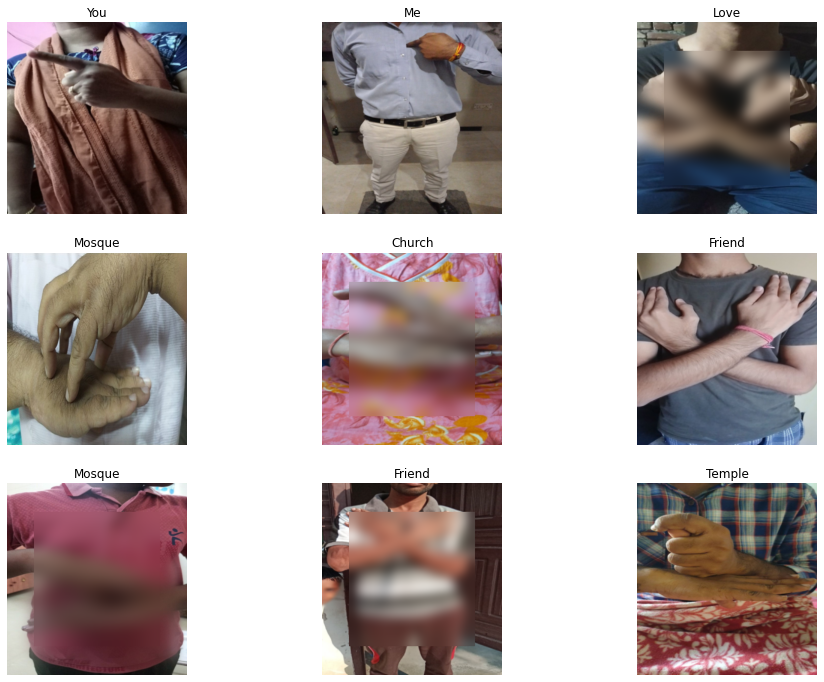

In [19]:
dataloaders, test_batch_gen = create_dataloaders(train=train, test=test,
                                        val_size=0.25,
                                        random_state=random_state,
                                        images_dir_train=path_train,
                                        images_dir_test=path_test,
                                        batch_size=batch_size, 
                                        labels_dict_copy=labels_dict_inversed)

plot_with_labels(dataloaders['train'], n_plots=9, labels_dict=labels_dict)

In [20]:
criterion = nn.CrossEntropyLoss()

In [21]:
# early stopping class
class EarlyStop:
    def __init__(self, patience=5, verbose=False,
                fname='checkpoint.pt'):
        """
        Stops trainig if validation loss doesn't increasing at given patience
        
        Args:
            patience (int): How long to wait until validaion loss increases.
                            Default: 5
            verbose (bool): If True, message of loss improvementis printed. 
                            Default: False
        """
        self.patience = patience
        self.verbose = verbose
        self.fname = os.path.join('Zindi_signs/', fname)
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.last_val_loss = np.Inf
        

    def __call__(self, val_loss, model):

        if self.best_score is None:
            self.best_score = val_loss
            self.save_checkpoint(val_loss, model)
            
        elif val_loss > self.best_score:
            self.counter += 1
            print(f'EarlyStop epoch: #{self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.last_val_loss:.6f} --> {val_loss:.6f}).  Saving model ...')
        self.last_val_loss = val_loss
        torch.save(model.state_dict(), os.path.join(path_start, self.fname))
        


In [22]:
def model_train(dataloaders, model, lr, num_epochs, criterion, batch_size=2, patience=None,
                fname='checkpoint.pt'):
    model = model.to(device)
    parameters = [param for param in model.parameters() if param.requires_grad] 
    optimizer = optim.Adam(model.parameters(), lr=lr)
    # Decay LR by a factor of 0.5 every 6 epochs
    exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.5)
    if patience != None:
        early_stop = EarlyStop(patience,verbose = True, fname=fname)
    for epoch in range(num_epochs):
        for stage in dataloaders.keys():
            if stage =='train':
                model.train()
            else:
                model.eval()
            current_corrects = 0.0
            current_loss = 0.0
            for images, labels in tqdm(dataloaders[stage]):
                images = images.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                out = model(images)
                loss = criterion(out, labels)
                
                _, preds = torch.max(out, 1)
                
                current_corrects = current_corrects + torch.sum(preds == labels.data)
                current_loss += loss.item() * images.size(0)
                if stage =='train':
                    loss.backward()
                    optimizer.step()
                    epoch_acc = current_corrects.double()/(len(dataloaders[stage])*batch_size)
            epoch_loss = current_loss/len(dataloaders[stage].dataset)
            print('Stage: {}, epoch:  {}, loss: {:.4f}, accuracy: {:.4f}'.format(stage, epoch,epoch_loss, epoch_acc))
            
            torch.cuda.empty_cache()

            if(stage == 'val'):
                early_stop(epoch_loss,model)      
            print(early_stop.early_stop)
            #if stage =='train':
            exp_lr_scheduler.step()
            print(exp_lr_scheduler.get_last_lr())
        if(early_stop.early_stop):
            print("Early stopping")
            fname = os.path.join('Zindi_signs/',fname)
            model.load_state_dict(torch.load(os.path.join(path_start, fname)))
            print('{} Accuracy: '.format(stage), epoch_acc.item())
            break
        print('{} Accuracy: '.format(stage), epoch_acc.item())
    return model
                
                
                
    

In [23]:
reg_net = models.regnet_x_8gf(pretrained=True)
in_features = reg_net.fc.in_features
reg_net.fc = nn.Linear(in_features, n_classes)

In [24]:
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
in_features = resnext50_32x4d.fc.in_features
resnext50_32x4d.fc = nn.Linear(in_features, n_classes)

In [25]:
effnet = models.efficientnet_b3(pretrained=True) 
in_features = effnet.classifier[1].in_features
effnet.classifier[1] = nn.Linear(in_features, n_classes)


In [26]:
models_list = [reg_net, resnext50_32x4d, effnet]

In [27]:
ans_list = []

for model in models_list:
    # dataframe for submission
    submission = sample_submission.copy()
    
    dataloaders, test_batch_gen = create_dataloaders(train=train, test=test,
                                        val_size=0.25,
                                        random_state=random_state,
                                        images_dir_train=path_train,
                                        images_dir_test=path_test,
                                        batch_size=batch_size, 
                                        labels_dict_copy=labels_dict_inversed)
    #train model
    print("Training model ", model.__class__.__name__)
    fname = model.__class__.__name__ + '.pt'
    model = model_train(dataloaders=dataloaders, model=model, lr=0.00001, num_epochs=50,
                        criterion=criterion, patience=7, batch_size=batch_size,
                        fname=fname)
    model.eval()
    sm = nn.Softmax(dim = 1)
    for images, names in tqdm(test_batch_gen):
        images = images.to(device)
        output = model(images)
        output = sm(output)
        for name, ans in zip(names[0],output.detach().cpu().numpy()):
            submission.loc[sample_submission.img_IDS==name, sample_submission.columns[1:]] = ans
    submission.to_csv(os.path.join(path_start,'Zindi_signs/subm9'+ model.__class__.__name__  + '.csv'), index=False)
    ans_list.append(submission.copy())
    
    # memory cleaning        
    del(model, dataloaders, test_batch_gen)
    gc.collect()
    torch.cuda.empty_cache()
    

Training model  RegNet


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  0, loss: 1.6662, accuracy: 0.4680
False
[1e-05]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  0, loss: 0.3884, accuracy: 0.4680
Validation loss decreased (inf --> 0.388439).  Saving model ...
False
[1e-05]
val Accuracy:  0.4679897567221511


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  1, loss: 0.7345, accuracy: 0.8045
False
[1e-05]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  1, loss: 0.2353, accuracy: 0.8045
Validation loss decreased (0.388439 --> 0.235290).  Saving model ...
False
[1e-05]
val Accuracy:  0.8045241143832693


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  2, loss: 0.4687, accuracy: 0.8745
False
[1e-05]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  2, loss: 0.2196, accuracy: 0.8745
Validation loss decreased (0.235290 --> 0.219630).  Saving model ...
False
[5e-06]
val Accuracy:  0.8745198463508324


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  3, loss: 0.3683, accuracy: 0.9033
False
[5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  3, loss: 0.2265, accuracy: 0.9033
EarlyStop epoch: #1 out of 7
False
[5e-06]
val Accuracy:  0.9033290653008963


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  4, loss: 0.3167, accuracy: 0.9140
False
[5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  4, loss: 0.2072, accuracy: 0.9140
Validation loss decreased (0.219630 --> 0.207240).  Saving model ...
False
[5e-06]
val Accuracy:  0.9139991463935127


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  5, loss: 0.2753, accuracy: 0.9255
False
[5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  5, loss: 0.2081, accuracy: 0.9255
EarlyStop epoch: #1 out of 7
False
[2.5e-06]
val Accuracy:  0.9255228339735383


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  6, loss: 0.2392, accuracy: 0.9396
False
[2.5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  6, loss: 0.2046, accuracy: 0.9396
Validation loss decreased (0.207240 --> 0.204557).  Saving model ...
False
[2.5e-06]
val Accuracy:  0.9396073410157918


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  7, loss: 0.2253, accuracy: 0.9426
False
[2.5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  7, loss: 0.1994, accuracy: 0.9426
Validation loss decreased (0.204557 --> 0.199360).  Saving model ...
False
[2.5e-06]
val Accuracy:  0.9425949637217244


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  8, loss: 0.2006, accuracy: 0.9441
False
[2.5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  8, loss: 0.2030, accuracy: 0.9441
EarlyStop epoch: #1 out of 7
False
[1.25e-06]
val Accuracy:  0.9440887750746906


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  9, loss: 0.2002, accuracy: 0.9488
False
[1.25e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  9, loss: 0.1955, accuracy: 0.9488
Validation loss decreased (0.199360 --> 0.195521).  Saving model ...
False
[1.25e-06]
val Accuracy:  0.9487836107554418


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  10, loss: 0.1826, accuracy: 0.9533
False
[1.25e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  10, loss: 0.2136, accuracy: 0.9533
EarlyStop epoch: #1 out of 7
False
[1.25e-06]
val Accuracy:  0.9532650448143406


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  11, loss: 0.1720, accuracy: 0.9567
False
[1.25e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  11, loss: 0.2099, accuracy: 0.9567
EarlyStop epoch: #2 out of 7
False
[6.25e-07]
val Accuracy:  0.9566794707639779


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  12, loss: 0.1729, accuracy: 0.9567
False
[6.25e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  12, loss: 0.1969, accuracy: 0.9567
EarlyStop epoch: #3 out of 7
False
[6.25e-07]
val Accuracy:  0.9566794707639779


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  13, loss: 0.1645, accuracy: 0.9567
False
[6.25e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  13, loss: 0.2027, accuracy: 0.9567
EarlyStop epoch: #4 out of 7
False
[6.25e-07]
val Accuracy:  0.9566794707639779


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  14, loss: 0.1633, accuracy: 0.9573
False
[6.25e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  14, loss: 0.2072, accuracy: 0.9573
EarlyStop epoch: #5 out of 7
False
[3.125e-07]
val Accuracy:  0.9573196756295348


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  15, loss: 0.1441, accuracy: 0.9637
False
[3.125e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  15, loss: 0.2101, accuracy: 0.9637
EarlyStop epoch: #6 out of 7
False
[3.125e-07]
val Accuracy:  0.9637217242851046


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  16, loss: 0.1611, accuracy: 0.9569
False
[3.125e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  16, loss: 0.2059, accuracy: 0.9569
EarlyStop epoch: #7 out of 7
True
[3.125e-07]
Early stopping
val Accuracy:  0.9568928723858302


  0%|          | 0/893 [00:00<?, ?it/s]

Training model  ResNet


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  0, loss: 1.6651, accuracy: 0.4439
False
[1e-05]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  0, loss: 0.4057, accuracy: 0.4439
Validation loss decreased (inf --> 0.405697).  Saving model ...
False
[1e-05]
val Accuracy:  0.4438753734528383


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  1, loss: 0.8268, accuracy: 0.7887
False
[1e-05]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  1, loss: 0.2463, accuracy: 0.7887
Validation loss decreased (0.405697 --> 0.246280).  Saving model ...
False
[1e-05]
val Accuracy:  0.7887323943661972


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  2, loss: 0.5693, accuracy: 0.8496
False
[1e-05]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  2, loss: 0.2229, accuracy: 0.8496
Validation loss decreased (0.246280 --> 0.222934).  Saving model ...
False
[5e-06]
val Accuracy:  0.8495518565941101


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  3, loss: 0.5036, accuracy: 0.8679
False
[5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  3, loss: 0.2136, accuracy: 0.8679
Validation loss decreased (0.222934 --> 0.213562).  Saving model ...
False
[5e-06]
val Accuracy:  0.8679043960734102


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  4, loss: 0.4403, accuracy: 0.8867
False
[5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  4, loss: 0.1897, accuracy: 0.8867
Validation loss decreased (0.213562 --> 0.189686).  Saving model ...
False
[5e-06]
val Accuracy:  0.8866837387964149


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  5, loss: 0.4006, accuracy: 0.8999
False
[5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  5, loss: 0.2058, accuracy: 0.8999
EarlyStop epoch: #1 out of 7
False
[2.5e-06]
val Accuracy:  0.8999146393512591


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  6, loss: 0.3521, accuracy: 0.9121
False
[2.5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  6, loss: 0.1947, accuracy: 0.9121
EarlyStop epoch: #2 out of 7
False
[2.5e-06]
val Accuracy:  0.9120785317968417


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  7, loss: 0.3368, accuracy: 0.9215
False
[2.5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  7, loss: 0.1908, accuracy: 0.9215
EarlyStop epoch: #3 out of 7
False
[2.5e-06]
val Accuracy:  0.921468203158344


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  8, loss: 0.3138, accuracy: 0.9221
False
[2.5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  8, loss: 0.1882, accuracy: 0.9221
Validation loss decreased (0.189686 --> 0.188177).  Saving model ...
False
[1.25e-06]
val Accuracy:  0.922108408023901


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  9, loss: 0.3203, accuracy: 0.9223
False
[1.25e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  9, loss: 0.1901, accuracy: 0.9223
EarlyStop epoch: #1 out of 7
False
[1.25e-06]
val Accuracy:  0.9223218096457534


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  10, loss: 0.2859, accuracy: 0.9315
False
[1.25e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  10, loss: 0.1974, accuracy: 0.9315
EarlyStop epoch: #2 out of 7
False
[1.25e-06]
val Accuracy:  0.9314980793854034


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  11, loss: 0.2856, accuracy: 0.9306
False
[1.25e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  11, loss: 0.1959, accuracy: 0.9306
EarlyStop epoch: #3 out of 7
False
[6.25e-07]
val Accuracy:  0.930644472897994


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  12, loss: 0.2756, accuracy: 0.9334
False
[6.25e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  12, loss: 0.1852, accuracy: 0.9334
Validation loss decreased (0.188177 --> 0.185247).  Saving model ...
False
[6.25e-07]
val Accuracy:  0.9334186939820743


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  13, loss: 0.2740, accuracy: 0.9324
False
[6.25e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  13, loss: 0.1910, accuracy: 0.9324
EarlyStop epoch: #1 out of 7
False
[6.25e-07]
val Accuracy:  0.9323516858728127


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  14, loss: 0.2660, accuracy: 0.9351
False
[6.25e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  14, loss: 0.1980, accuracy: 0.9351
EarlyStop epoch: #2 out of 7
False
[3.125e-07]
val Accuracy:  0.9351259069568929


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  15, loss: 0.2579, accuracy: 0.9415
False
[3.125e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  15, loss: 0.1874, accuracy: 0.9415
EarlyStop epoch: #3 out of 7
False
[3.125e-07]
val Accuracy:  0.9415279556124627


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  16, loss: 0.2621, accuracy: 0.9392
False
[3.125e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  16, loss: 0.1879, accuracy: 0.9392
EarlyStop epoch: #4 out of 7
False
[3.125e-07]
val Accuracy:  0.9391805377720871


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  17, loss: 0.2664, accuracy: 0.9385
False
[3.125e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  17, loss: 0.1909, accuracy: 0.9385
EarlyStop epoch: #5 out of 7
False
[1.5625e-07]
val Accuracy:  0.9385403329065302


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  18, loss: 0.2616, accuracy: 0.9407
False
[1.5625e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  18, loss: 0.1841, accuracy: 0.9407
Validation loss decreased (0.185247 --> 0.184120).  Saving model ...
False
[1.5625e-07]
val Accuracy:  0.9406743491250534


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  19, loss: 0.2625, accuracy: 0.9415
False
[1.5625e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  19, loss: 0.1967, accuracy: 0.9415
EarlyStop epoch: #1 out of 7
False
[1.5625e-07]
val Accuracy:  0.9415279556124627


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  20, loss: 0.2448, accuracy: 0.9417
False
[1.5625e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  20, loss: 0.1897, accuracy: 0.9417
EarlyStop epoch: #2 out of 7
False
[7.8125e-08]
val Accuracy:  0.9417413572343151


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  21, loss: 0.2427, accuracy: 0.9434
False
[7.8125e-08]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  21, loss: 0.1883, accuracy: 0.9434
EarlyStop epoch: #3 out of 7
False
[7.8125e-08]
val Accuracy:  0.9434485702091336


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  22, loss: 0.2692, accuracy: 0.9366
False
[7.8125e-08]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  22, loss: 0.1883, accuracy: 0.9366
EarlyStop epoch: #4 out of 7
False
[7.8125e-08]
val Accuracy:  0.9366197183098592


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  23, loss: 0.2489, accuracy: 0.9417
False
[7.8125e-08]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  23, loss: 0.1936, accuracy: 0.9417
EarlyStop epoch: #5 out of 7
False
[3.90625e-08]
val Accuracy:  0.9417413572343151


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  24, loss: 0.2484, accuracy: 0.9454
False
[3.90625e-08]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  24, loss: 0.1849, accuracy: 0.9454
EarlyStop epoch: #6 out of 7
False
[3.90625e-08]
val Accuracy:  0.9453691848058046


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  25, loss: 0.2557, accuracy: 0.9405
False
[3.90625e-08]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  25, loss: 0.1875, accuracy: 0.9405
EarlyStop epoch: #7 out of 7
True
[3.90625e-08]
Early stopping
val Accuracy:  0.9404609475032011


  0%|          | 0/893 [00:00<?, ?it/s]

Training model  EfficientNet


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  0, loss: 2.1606, accuracy: 0.1878
False
[1e-05]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  0, loss: 3.0913, accuracy: 0.1878
Validation loss decreased (inf --> 3.091338).  Saving model ...
False
[1e-05]
val Accuracy:  0.18779342723004697


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  1, loss: 1.8773, accuracy: 0.4270
False
[1e-05]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  1, loss: 1.8168, accuracy: 0.4270
Validation loss decreased (3.091338 --> 1.816768).  Saving model ...
False
[1e-05]
val Accuracy:  0.4270166453265045


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  2, loss: 1.3203, accuracy: 0.6340
False
[1e-05]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  2, loss: 0.8740, accuracy: 0.6340
Validation loss decreased (1.816768 --> 0.874024).  Saving model ...
False
[5e-06]
val Accuracy:  0.6340162185232608


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  3, loss: 1.0268, accuracy: 0.7145
False
[5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  3, loss: 0.4723, accuracy: 0.7145
Validation loss decreased (0.874024 --> 0.472252).  Saving model ...
False
[5e-06]
val Accuracy:  0.7144686299615878


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  4, loss: 0.9221, accuracy: 0.7467
False
[5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  4, loss: 1.6689, accuracy: 0.7467
EarlyStop epoch: #1 out of 7
False
[5e-06]
val Accuracy:  0.746692274861289


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  5, loss: 0.8195, accuracy: 0.7749
False
[5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  5, loss: 7.2642, accuracy: 0.7749
EarlyStop epoch: #2 out of 7
False
[2.5e-06]
val Accuracy:  0.774861288945796


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  6, loss: 0.7750, accuracy: 0.7830
False
[2.5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  6, loss: 1.2001, accuracy: 0.7830
EarlyStop epoch: #3 out of 7
False
[2.5e-06]
val Accuracy:  0.7829705505761844


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  7, loss: 0.7521, accuracy: 0.7930
False
[2.5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  7, loss: 0.3581, accuracy: 0.7930
Validation loss decreased (0.472252 --> 0.358125).  Saving model ...
False
[2.5e-06]
val Accuracy:  0.7930004268032438


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  8, loss: 0.7209, accuracy: 0.8043
False
[2.5e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  8, loss: 0.3433, accuracy: 0.8043
Validation loss decreased (0.358125 --> 0.343341).  Saving model ...
False
[1.25e-06]
val Accuracy:  0.804310712761417


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  9, loss: 0.6900, accuracy: 0.8050
False
[1.25e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  9, loss: 0.5139, accuracy: 0.8050
EarlyStop epoch: #1 out of 7
False
[1.25e-06]
val Accuracy:  0.804950917626974


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  10, loss: 0.6720, accuracy: 0.8160
False
[1.25e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  10, loss: 0.6670, accuracy: 0.8160
EarlyStop epoch: #2 out of 7
False
[1.25e-06]
val Accuracy:  0.816047801963295


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  11, loss: 0.6660, accuracy: 0.8152
False
[1.25e-06]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  11, loss: 0.5956, accuracy: 0.8152
EarlyStop epoch: #3 out of 7
False
[6.25e-07]
val Accuracy:  0.8151941954758857


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  12, loss: 0.6698, accuracy: 0.8165
False
[6.25e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  12, loss: 0.3777, accuracy: 0.8165
EarlyStop epoch: #4 out of 7
False
[6.25e-07]
val Accuracy:  0.8164746052069997


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  13, loss: 0.6520, accuracy: 0.8235
False
[6.25e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  13, loss: 0.2344, accuracy: 0.8235
Validation loss decreased (0.343341 --> 0.234416).  Saving model ...
False
[6.25e-07]
val Accuracy:  0.8235168587281264


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  14, loss: 0.6544, accuracy: 0.8195
False
[6.25e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  14, loss: 0.2675, accuracy: 0.8195
EarlyStop epoch: #1 out of 7
False
[3.125e-07]
val Accuracy:  0.8194622279129322


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  15, loss: 0.6377, accuracy: 0.8192
False
[3.125e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  15, loss: 0.3330, accuracy: 0.8192
EarlyStop epoch: #2 out of 7
False
[3.125e-07]
val Accuracy:  0.8192488262910799


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  16, loss: 0.6290, accuracy: 0.8233
False
[3.125e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  16, loss: 0.7527, accuracy: 0.8233
EarlyStop epoch: #3 out of 7
False
[3.125e-07]
val Accuracy:  0.8233034571062741


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  17, loss: 0.6464, accuracy: 0.8192
False
[3.125e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  17, loss: 0.3222, accuracy: 0.8192
EarlyStop epoch: #4 out of 7
False
[1.5625e-07]
val Accuracy:  0.8192488262910799


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  18, loss: 0.6346, accuracy: 0.8227
False
[1.5625e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  18, loss: 0.5122, accuracy: 0.8227
EarlyStop epoch: #5 out of 7
False
[1.5625e-07]
val Accuracy:  0.822663252240717


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  19, loss: 0.6307, accuracy: 0.8252
False
[1.5625e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  19, loss: 1.7537, accuracy: 0.8252
EarlyStop epoch: #6 out of 7
False
[1.5625e-07]
val Accuracy:  0.825224071702945


  0%|          | 0/1562 [00:00<?, ?it/s]

Stage: train, epoch:  20, loss: 0.6303, accuracy: 0.8269
False
[1.5625e-07]


  0%|          | 0/521 [00:00<?, ?it/s]

Stage: val, epoch:  20, loss: 0.2526, accuracy: 0.8269
EarlyStop epoch: #7 out of 7
True
[7.8125e-08]
Early stopping
val Accuracy:  0.8269312846777636


  0%|          | 0/893 [00:00<?, ?it/s]

In [28]:
sample_submission.iloc[:,1:] = pd.concat([ans_list[0], ans_list[1], ans_list[2]]).groupby(level=0).mean()

In [29]:
sample_submission.to_csv(os.path.join(path_start,'Zindi_signs/3_combined.csv'), index=False)